<a href="https://colab.research.google.com/github/asif79941/projects/blob/main/insurance_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from  sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
data=pd.read_csv("/content/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


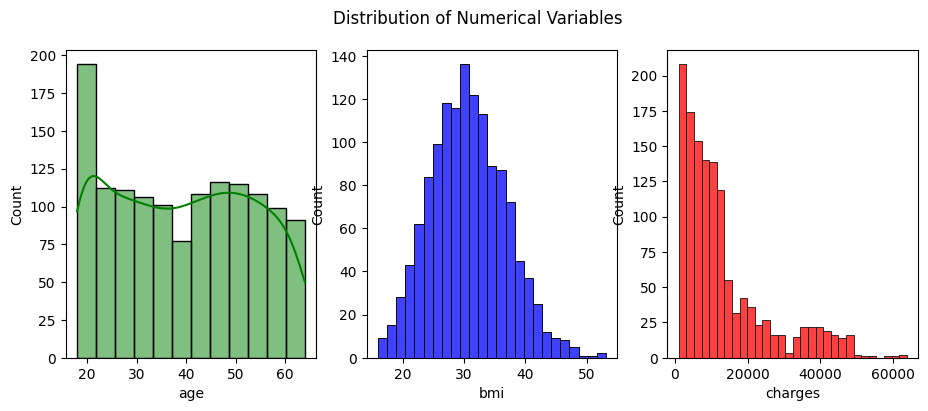

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(1,3,1)
plt.suptitle('Distribution of Numerical Variables')
sns.histplot(data['age'],color="green",kde=True)

plt.subplot(1,3,2)
sns.histplot(data['bmi'],color="blue")

plt.subplot(1,3,3)
sns.histplot(data['charges'],color="red")

plt.show()


Text(0, 0.5, 'Total count')

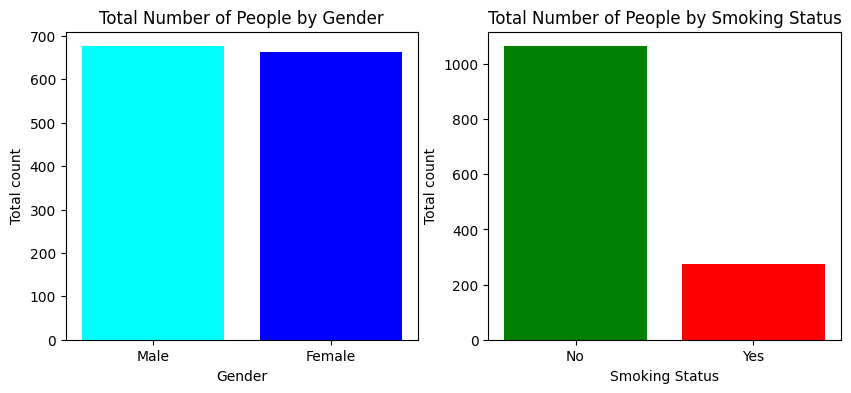

In [ ]:
count_gender = data['sex'].value_counts()
FM = ['Male', 'Female']
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.bar(FM, count_gender, color=['cyan', 'blue'])
plt.title("Total Number of People by Gender")
plt.xlabel("Gender")
plt.ylabel("Total count")

count_smoking = data['smoker'].value_counts()
Smoke = ['No', 'Yes']

plt.subplot(1, 2, 2)
plt.bar(Smoke, count_smoking, color=['green', 'red'])
plt.title("Total Number of People by Smoking Status")
plt.xlabel("Smoking Status")
plt.ylabel("Total count")


In [ ]:
categorical_features = ['sex', 'smoker', 'region']
label_encoders = {}
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

In [ ]:
x = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']

In [ ]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
ma=mean_absolute_error(y_test,y_pred)
ma

4178.116485416857

In [ ]:
r2_score(y_test,y_pred)


0.7602344599010098

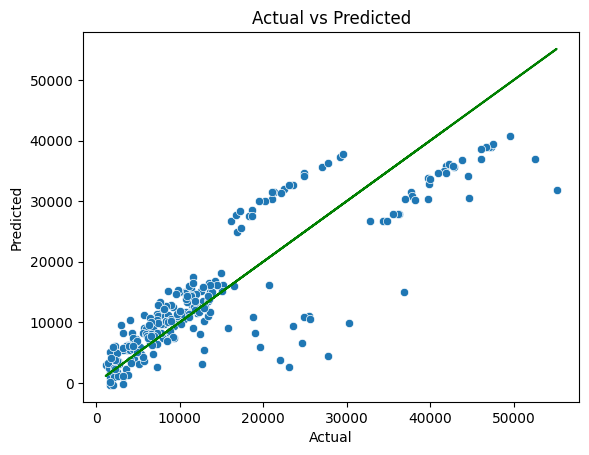

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot(y_test,y_test,color='green')
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
import joblib
joblib.dump(lr, 'insurance_model.pkl')

['insurance_model.pkl']